In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.kernel_ridge import KernelRidge
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Linear regression
First we need some "linear" data that we can play with.

In [ ]:
X, y = make_regression(n_samples=100, n_features=1, noise=0.1)

Then preproces the data by splitting between training and testing (80/20) and standardize data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=80, test_size=20)

y_train = y_train.reshape(y_train.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

X_scaler, y_scaler = StandardScaler(), StandardScaler()

X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)

X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

Fit the model (linear), make predictions and evaluate (mse)

In [ ]:
model = KernelRidge()

model = model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

y_pred_test = model.predict(X_test)

mean_squared_error(y_test, y_pred_test)

8.52563427712478e-05

Compare graphically the real values and predictions on training data

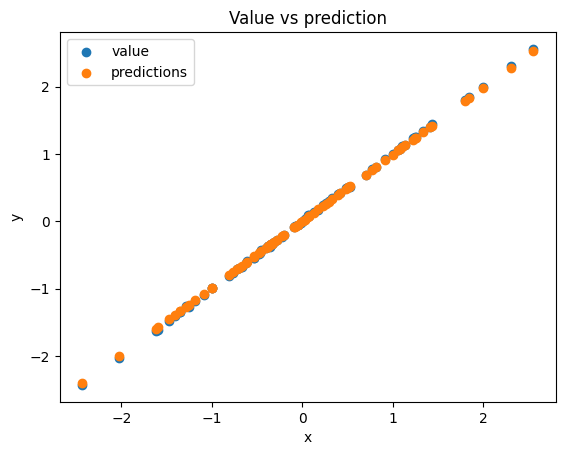

In [ ]:
plt.title("Value vs prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(X_train,y_train,label="value")
plt.scatter(X_train,y_pred_train,label="predictions",marker='o')
plt.legend()

# Sinuosidal data
Let's do the same with sinuosidal data and Gaussian kernel

In [ ]:
rng = np.random.RandomState(42)
X = 5 * rng.rand(100, 1)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(X.shape[0] // 5))

Preprocess the data (splitting/standardization)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=80, test_size=20)

y_train = y_train.reshape(y_train.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

X_scaler, y_scaler = StandardScaler(), StandardScaler()

X_train = X_scaler.fit_transform(X_train)
y_train = y_scaler.fit_transform(y_train)

X_test = X_scaler.transform(X_test)
y_test = y_scaler.transform(y_test)

Do a RBF kernel regression and evaluate it+plot the value vs prediction

In [ ]:
model = KernelRidge(kernel="rbf")

model = model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)

y_pred_test = model.predict(X_test)

mean_squared_error(y_test, y_pred_test)

0.3842291034456252

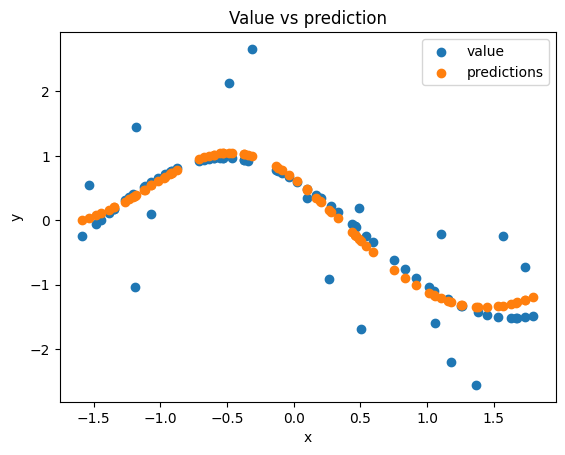

In [ ]:
plt.title("Value vs prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(X_train,y_train,label="value")
plt.scatter(X_train,y_pred_train,label="predictions",marker='o')
plt.legend()

# Real data: Insurance

In [ ]:
# Load with pandas
import pandas as pd
import seaborn as sns

file_path="insurance.csv"
data = pd.read_csv(file_path)

print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


## Categorical variable counts

<Axes: xlabel='sex', ylabel='count'>

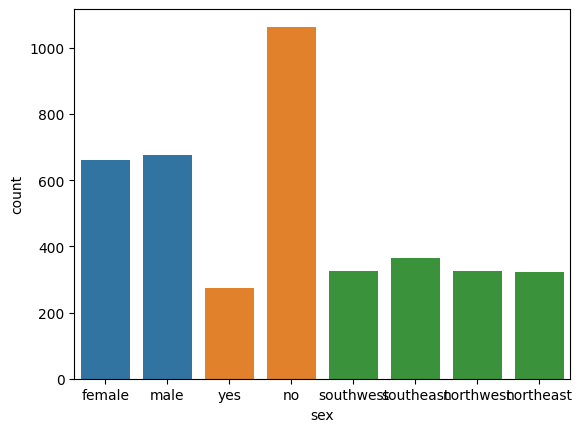

In [ ]:
sns.countplot(x='sex', data=data)
sns.countplot(x='smoker', data=data)
sns.countplot(x='region', data=data)

In [ ]:
data = pd.get_dummies(data)
X = data.drop(["charges"], axis=1)
Y = data["charges"]

<Axes: >

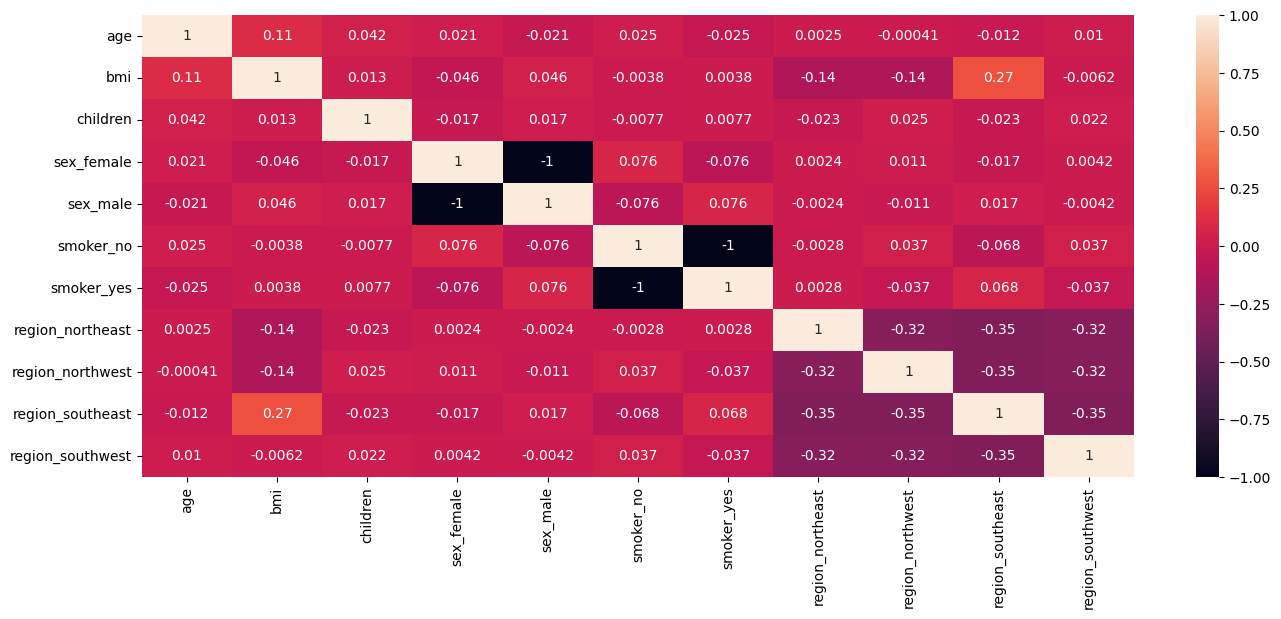

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(X.corr(), annot=True)

<Axes: >

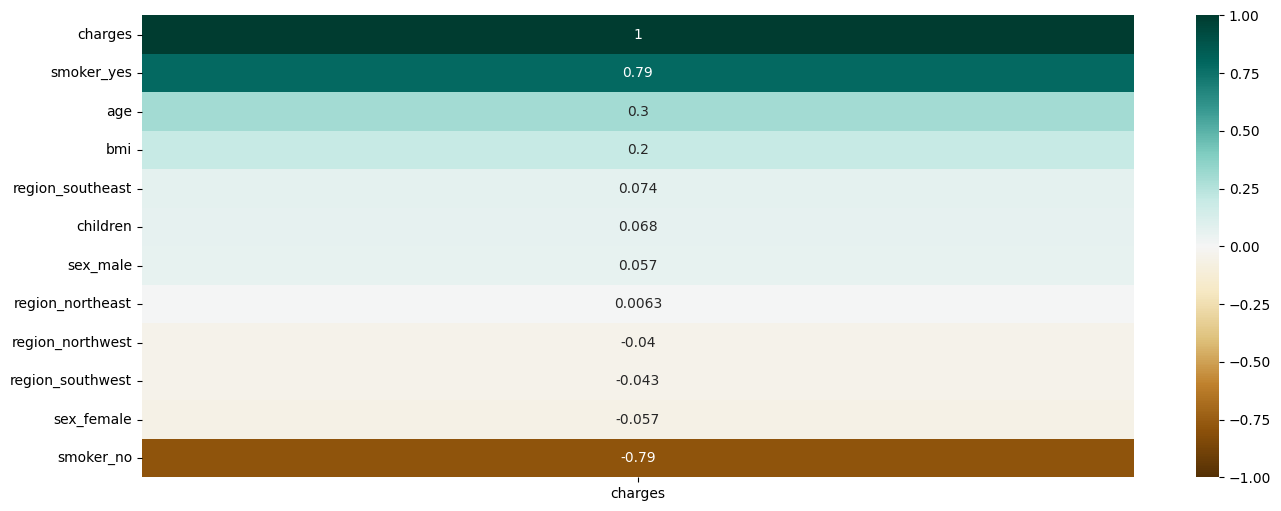

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(data.corr()[['charges']].sort_values(by='charges', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')


## Preprocess data

In [ ]:
X = X.to_numpy()
Y = Y.to_numpy()
# split into training and testing sets
n = len(X)

train_perc = 0.75  # percentage of training set
train_ind = range(0, int(train_perc*n))  # indices of dataset for training
train_x = X[train_ind]
train_y = np.log(Y[train_ind])  # perform logarithm transformation

test_ind = range(n-int(train_perc*n), n)  # indices of dataset for testing
test_x = X[test_ind]
test_y = np.log(Y[test_ind])  # perform logarithm transformation

## Linear regression

Train a linear regression model and evaluate it on training and testing

In [ ]:
model = KernelRidge()

model = model.fit(train_x, train_y)

pred_train_y = model.predict(train_x)

pred_test_y = model.predict(test_x)

print(f"Training MSE: {mean_squared_error(train_y, pred_train_y)}")
print(f"Testing MSE: {mean_squared_error(test_y, test_y)}")

Training MSE: 0.1832953117636071
Testing MSE: 0.0


## Ridge regression

Let's do the same by plotting training and testing mse for different values of the regularization parameter $\lambda$

In [ ]:
lambda_values = np.logspace(-10,10,100)
training_mses = np.zeros(100)
testing_mses = np.zeros(100)

for index, lambda_value in enumerate(lambda_values):
  model = KernelRidge(alpha = lambda_value)
  model = model.fit(train_x, train_y)
  pred_train_y = model.predict(train_x)
  pred_test_y = model.predict(test_x)
  training_mses[index] = mean_squared_error(train_y, pred_train_y)
  testing_mses[index] = mean_squared_error(test_y, pred_test_y)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.96447e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=8.26464e-18): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=2.18366e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=3.81071e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-

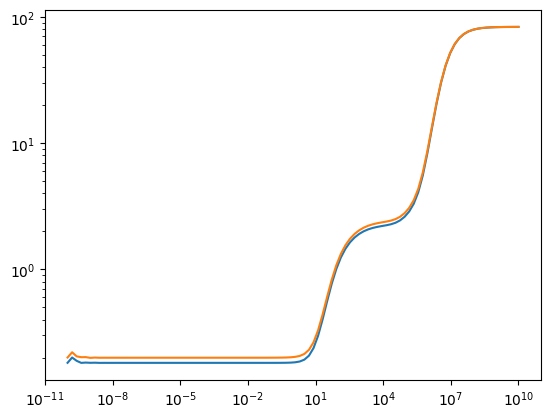

In [ ]:
plt.loglog(lambda_values, training_mses, label="Training MSE")
plt.loglog(lambda_values, testing_mses, label="Testing MSE")

## Kernel regression with polynomials

The same as before but for different values of the degree

In [ ]:
degree_values = np.arange(1,11)
training_mses = np.zeros(len(degree_values))
testing_mses = np.zeros(len(degree_values))

for index, degree_value in enumerate(degree_values):
  model = KernelRidge(kernel = "poly", degree = degree_value)
  model = model.fit(train_x, train_y)
  pred_train_y = model.predict(train_x)
  pred_test_y = model.predict(test_x)
  training_mses[index] = mean_squared_error(train_y, pred_train_y)
  testing_mses[index] = mean_squared_error(test_y, pred_test_y)

/usr/local/lib/python3.12/dist-packages/scipy/_lib/_util.py:1233: LinAlgWarning: Ill-conditioned matrix (rcond=1.8386e-17): result may not be accurate.
  return f(*arrays, *other_args, **kwargs)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_ridge.py:254: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_rid

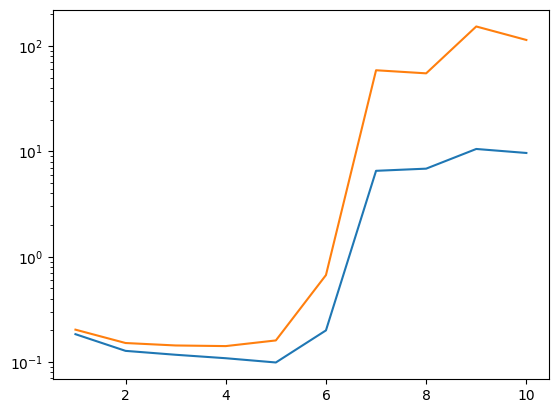

In [ ]:
plt.semilogy(degree_values, training_mses, label="Training MSE")
plt.semilogy(degree_values, testing_mses, label="Testing MSE")